In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel("crop_data_dict.xlsx")

In [5]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andhra Pradesh,ANANTAPUR,2011,Kharif,Arhar/Tur,51728.0,4293.0
1,Andhra Pradesh,ANANTAPUR,2011,Kharif,Bajra,2614.0,3307.0
2,Andhra Pradesh,ANANTAPUR,2011,Kharif,Castor seed,30203.0,1843.0
3,Andhra Pradesh,ANANTAPUR,2011,Kharif,Cotton(lint),19299.0,12069.0
4,Andhra Pradesh,ANANTAPUR,2011,Kharif,Cowpea(Lobia),846.0,150.0
...,...,...,...,...,...,...,...
52244,Sikkim,WEST DISTRICT,2015,Kharif,Soyabean,546.0,520.0
52245,Sikkim,WEST DISTRICT,2015,Kharif,Urad,914.0,811.0
52246,Sikkim,WEST DISTRICT,2015,Rabi,Barley,12.0,11.0
52247,Sikkim,WEST DISTRICT,2015,Rabi,Rapeseed &Mustard,625.0,540.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52249 entries, 0 to 52248
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     52249 non-null  object 
 1   District_Name  52249 non-null  object 
 2   Crop_Year      52249 non-null  int64  
 3   Season         52249 non-null  object 
 4   Crop           52249 non-null  object 
 5   Area           52249 non-null  float64
 6   Production     51429 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.8+ MB


In [7]:
print(df.Crop.unique(), df.Crop.nunique())

['Arhar/Tur' 'Bajra' 'Castor seed' 'Cotton(lint)' 'Cowpea(Lobia)'
 'Dry chillies' 'Groundnut' 'Horse-gram' 'Jowar' 'Maize' 'Mesta'
 'Moong(Green Gram)' 'Onion' 'Other Kharif pulses' 'other oilseeds' 'Ragi'
 'Rice' 'Small millets' 'Soyabean' 'Urad' 'Gram' 'Safflower' 'Wheat'
 'Arecanut' 'Banana' 'Coriander' 'Potato' 'Sugarcane' 'Sunflower'
 'Sweet potato' 'Tobacco' 'Turmeric' 'Sesamum' 'Linseed'
 'Other  Rabi pulses' 'Cashewnut' 'Tapioca' 'Niger seed'
 'Rapeseed &Mustard' 'Dry ginger' 'Garlic' 'Oilseeds total' 'Paddy' 'Jute'
 'Orange' 'Papaya' 'Black pepper' 'Ginger' 'Masoor'
 'Peas & beans (Pulses)' 'Pineapple' 'Barley' 'Khesari' 'Sannhamp' 'Moth'
 'Guar seed' 'Other Cereals & Millets' 'Cardamom' 'Blackgram' 'Mango'
 'Brinjal' 'Grapes' 'Lemon' 'Pome Granet' 'Sapota' 'Tomato' 'Cabbage'
 'Drum Stick' 'Jack Fruit' 'Pump Kin' 'Other Fresh Fruits'
 'Other Vegetables' 'Colocosia' 'Lentil' 'Bean' 'Jobster' 'Perilla'
 'Rajmash Kholar' 'Ricebean (nagadal)' 'Pulses total' 'Total foodgrain'] 81


In [9]:
df.dropna(axis=0, how='any', inplace=True)

In [10]:
print(df.isnull().sum())

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


In [12]:
df['P/A']=df['Production']/df['Area']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51429 entries, 0 to 52248
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     51429 non-null  object 
 1   District_Name  51429 non-null  object 
 2   Crop_Year      51429 non-null  int64  
 3   Season         51429 non-null  object 
 4   Crop           51429 non-null  object 
 5   Area           51429 non-null  float64
 6   Production     51429 non-null  float64
 7   P/A            51429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 3.5+ MB


In [16]:
columns_remove=["Crop_Year","Area","Production"]

In [17]:
df.drop(columns_remove, axis=1, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51429 entries, 0 to 52248
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  51429 non-null  object 
 1   Season         51429 non-null  object 
 2   Crop           51429 non-null  object 
 3   P/A            51429 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [47]:
df.drop('combined', axis=1, inplace=True)

In [50]:
df['combined'] = df['District_Name'].astype(str) + df['Season'].astype(str) + df['Crop'].astype(str)

In [49]:
df['Season'].str.strip()
df['District_Name'].str.strip()
df['Crop'].str.strip()


0                Arhar/Tur
1                    Bajra
2              Castor seed
3             Cotton(lint)
4            Cowpea(Lobia)
               ...        
52244             Soyabean
52245                 Urad
52246               Barley
52247    Rapeseed &Mustard
52248                Wheat
Name: Crop, Length: 51429, dtype: object

In [51]:
df['combined'].head(20)

0               ANANTAPURKharif     Arhar/Tur
1                   ANANTAPURKharif     Bajra
2             ANANTAPURKharif     Castor seed
3            ANANTAPURKharif     Cotton(lint)
4           ANANTAPURKharif     Cowpea(Lobia)
5            ANANTAPURKharif     Dry chillies
6               ANANTAPURKharif     Groundnut
7              ANANTAPURKharif     Horse-gram
8                   ANANTAPURKharif     Jowar
9                   ANANTAPURKharif     Maize
10                  ANANTAPURKharif     Mesta
11      ANANTAPURKharif     Moong(Green Gram)
12                  ANANTAPURKharif     Onion
13    ANANTAPURKharif     Other Kharif pulses
14         ANANTAPURKharif     other oilseeds
15                   ANANTAPURKharif     Ragi
16                   ANANTAPURKharif     Rice
17          ANANTAPURKharif     Small millets
18               ANANTAPURKharif     Soyabean
19                   ANANTAPURKharif     Urad
Name: combined, dtype: object

In [60]:
df['combined']=df['combined'].apply(str)
df['combined'] = df['combined'].str.replace(' ', '')

In [61]:
df['combined']

0                ANANTAPURKharifArhar/Tur
1                    ANANTAPURKharifBajra
2               ANANTAPURKharifCastorseed
3             ANANTAPURKharifCotton(lint)
4            ANANTAPURKharifCowpea(Lobia)
                       ...               
52244          WESTDISTRICTKharifSoyabean
52245              WESTDISTRICTKharifUrad
52246              WESTDISTRICTRabiBarley
52247    WESTDISTRICTRabiRapeseed&Mustard
52248               WESTDISTRICTRabiWheat
Name: combined, Length: 51429, dtype: object

In [62]:
hash_table = {}
for index, row in df.iterrows():
    # Insert the string-float mapping into the hash table
    hash_table[row['combined']] = row['P/A']

In [63]:
string=df['combined'][5]
hash_table[string]

4.232940335834226

In [66]:
string1="ANANTAPUR"
string2="Kharif"
string3="Arhar/Tur"

string4=string1+string2+string3

print(hash_table[string4])

0.12898674192002557


In [68]:
District_Names=list(df['District_Name'].unique())

In [77]:
column=df['P/A']
frequency_distribution = column.value_counts()

In [78]:
print(frequency_distribution)

1.000000     1470
0.500000      668
0.333333      370
0.666667      303
2.000000      301
             ... 
25.747253       1
0.602837        1
2.547297        1
2.957874        1
0.887309        1
Name: P/A, Length: 35420, dtype: int64


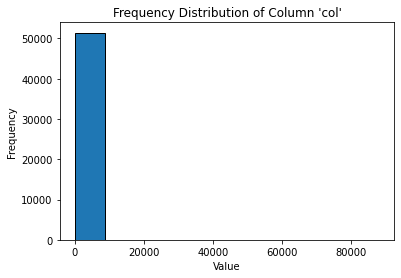

In [81]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(df['P/A'], edgecolor='black')

# Adding labels and titles to the plot
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Column 'col'")

# Display the plot
plt.show()